In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import math 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [69]:
import tensorflow as tf
from tensorflow import keras

In [70]:
print(tf.__version__)

2.6.2


In [71]:
np.random.seed(19)

In [72]:
df=pd.read_csv("../input/goldds/combinedSample_GoldDs.csv")

In [73]:
df.head()

,Local time,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask
0,14.03.2021 22:00:00.000 GMT-0000,1727.188,1729.078,1727.068,1728.258,64608.9986,1727.662,1730.222,1727.646,1729.522,61275.0016
1,14.03.2021 22:01:00.000 GMT-0000,1728.425,1729.821,1728.415,1729.424,71534.9987,1729.522,1730.421,1729.442,1730.405,80849.9977
2,14.03.2021 22:02:00.000 GMT-0000,1729.468,1730.298,1729.404,1730.118,38320.0012,1730.405,1730.611,1730.275,1730.545,59829.9988
3,14.03.2021 22:03:00.000 GMT-0000,1730.118,1730.304,1728.971,1729.141,26130.0001,1730.535,1730.625,1729.425,1729.765,36355.0000
4,14.03.2021 22:04:00.000 GMT-0000,1729.141,1729.431,1728.318,1728.708,30500.0003,1729.676,1729.862,1728.835,1729.219,49090.0017


In [74]:
df['Local time']=df['Local time'].str[0:22]
df['Local time']

0         14.03.2021 22:00:00.00
1         14.03.2021 22:01:00.00
2         14.03.2021 22:02:00.00
3         14.03.2021 22:03:00.00
4         14.03.2021 22:04:00.00
                   ...          
371274    11.03.2022 21:55:00.00
371275    11.03.2022 21:56:00.00
371276    11.03.2022 21:57:00.00
371277    11.03.2022 21:58:00.00
371278    11.03.2022 21:59:00.00
Name: Local time, Length: 371279, dtype: object

In [75]:
df["Open"]=(df["Open_Bid"]+df["Open_Ask"])/2
df["High"]=(df["High_Bid"]+df["High_Ask"])/2
df["Low"]=(df["Low_Bid"]+df["Low_Ask"])/2
df["Close"]=(df["Close_Bid"]+df["Close_Ask"])/2

In [76]:
df.shape

(371279, 15)

In [77]:
df=df[:10000]
df.shape

(10000, 15)

In [78]:

df.head()

,Local time,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Open,High,Low,Close
0,14.03.2021 22:00:00.00,1727.188,1729.078,1727.068,1728.258,64608.9986,1727.662,1730.222,1727.646,1729.522,61275.0016,1727.4250,1729.6500,1727.3570,1728.8900
1,14.03.2021 22:01:00.00,1728.425,1729.821,1728.415,1729.424,71534.9987,1729.522,1730.421,1729.442,1730.405,80849.9977,1728.9735,1730.1210,1728.9285,1729.9145
2,14.03.2021 22:02:00.00,1729.468,1730.298,1729.404,1730.118,38320.0012,1730.405,1730.611,1730.275,1730.545,59829.9988,1729.9365,1730.4545,1729.8395,1730.3315
3,14.03.2021 22:03:00.00,1730.118,1730.304,1728.971,1729.141,26130.0001,1730.535,1730.625,1729.425,1729.765,36355.0000,1730.3265,1730.4645,1729.1980,1729.4530
4,14.03.2021 22:04:00.00,1729.141,1729.431,1728.318,1728.708,30500.0003,1729.676,1729.862,1728.835,1729.219,49090.0017,1729.4085,1729.6465,1728.5765,1728.9635


In [79]:
data=df.drop(['Local time','Open_Bid','High_Bid','Low_Bid','Close_Bid','Open_Ask','High_Ask','Low_Ask','Close_Ask'],axis=1)

In [80]:
data=data.drop(['Volume_Bid','Volume_Ask'],axis=1)

In [81]:
data.head()

,Open,High,Low,Close
0,1727.4250,1729.6500,1727.3570,1728.8900
1,1728.9735,1730.1210,1728.9285,1729.9145
2,1729.9365,1730.4545,1729.8395,1730.3315
3,1730.3265,1730.4645,1729.1980,1729.4530
4,1729.4085,1729.6465,1728.5765,1728.9635


<AxesSubplot:>

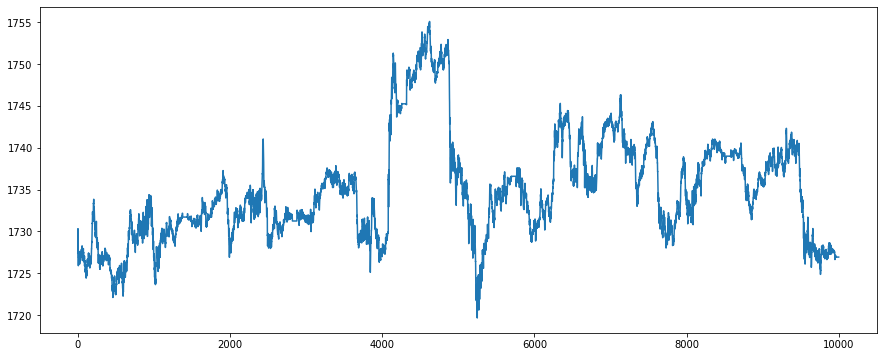

In [82]:
data['Open'].plot(figsize=(15,6))

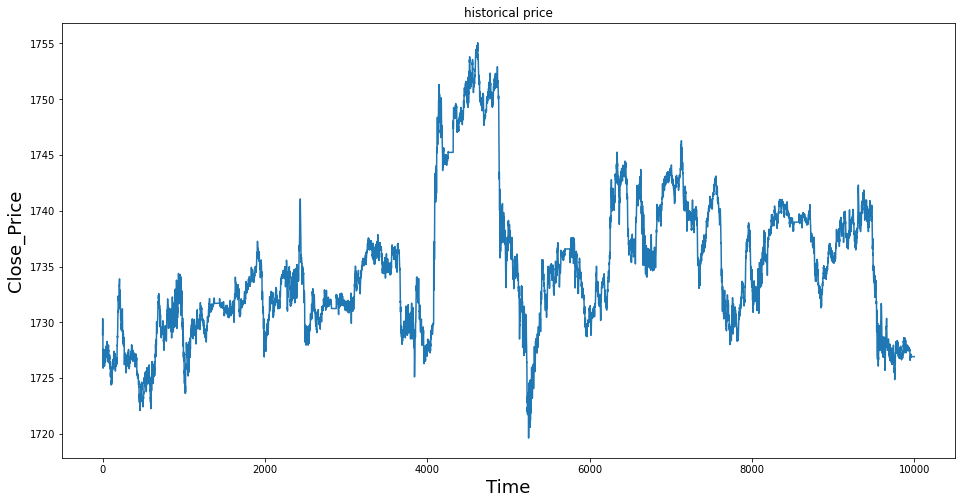

In [83]:
plt.figure(figsize=(16,8))
plt.title('historical price')
plt.plot(df['Close'])
plt.xlabel('Time', fontsize=18)
plt.ylabel('Close_Price', fontsize=18)
plt.show()

In [84]:
data_mini = data.iloc[-100:] # Select recent data rows
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=data_mini.index, open=data_mini['Open'], high=data_mini['High'], low=data_mini['Low'], close=data_mini['Close'])])
fig.show()

In [85]:
#downsizing
data['Open']=pd.to_numeric(data['Open'],downcast='float')
data['High']=pd.to_numeric(data['High'],downcast='float')
data['Low']=pd.to_numeric(data['Low'],downcast='float')
data['Close']=pd.to_numeric(data['Close'],downcast='float')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    10000 non-null  float32
 1   High    10000 non-null  float32
 2   Low     10000 non-null  float32
 3   Close   10000 non-null  float32
dtypes: float32(4)
memory usage: 156.4 KB


In [86]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .9 ))
validation_data_len = int(np.ceil( len(dataset) * .05 ))
test_data_len = int(np.ceil( len(dataset) * .05 ))
print(training_data_len)
print(validation_data_len)
print(test_data_len)


9000
500
500


In [87]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

In [88]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data= scaler.fit_transform(dataset)
scaled_data[:5]

array([[0.26112969],
       [0.29004219],
       [0.30181038],
       [0.27701816],
       [0.26320394]])

In [89]:
print(data.isna().sum())

Close    0
dtype: int64


In [90]:
train_data = scaled_data[0:int(training_data_len), :]
valid_data = scaled_data[int(training_data_len)- 60: int(training_data_len) + int(validation_data_len), :]
print(train_data.shape)
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(9000, 1)
[array([0.26112969, 0.29004219, 0.30181038, 0.27701816, 0.26320394,
       0.19344142, 0.18916593, 0.17680509, 0.18954691, 0.22228337,
       0.22177539, 0.20300837, 0.20422187, 0.2239343 , 0.22006801,
       0.21504466, 0.22397663, 0.2128293 , 0.2196447 , 0.21367594,
       0.21861463, 0.22274902, 0.21946126, 0.21706247, 0.18178611,
       0.20027092, 0.18982912, 0.19787213, 0.20662067, 0.20403844,
       0.21903794, 0.21649805, 0.20718509, 0.19363897, 0.19688439,
       0.21508699, 0.21861463, 0.22016679, 0.2229889 , 0.21028941,
       0.22073121, 0.21450846, 0.20972499, 0.20704398, 0.22092876,
       0.21932015, 0.23314849, 0.21917905, 0.21776799, 0.21028941,
       0.20506851, 0.20662067, 0.21438146, 0.21692136, 0.21480478,
       0.2179091 , 0.24429581, 0.23987921, 0.23149755, 0.23290861])]
[0.2095697695748484]

[array([0.26112969, 0.29004219, 0.30181038, 0.27701816, 0.26320394,
       0.19344142, 0.18916593, 0.17680509, 0.18954691, 0.22228337,
       0.22177539, 0.20300

(8940, 60, 1)

In [91]:
#Split the data into x_valid and y_valid data sets
x_valid = []
y_valid = []

for i in range(60, len(valid_data)):
    x_valid.append(valid_data[i-60:i, 0])
    y_valid.append(valid_data[i, 0])
    if i<= 61:
        print(x_valid)
        print(y_valid)
        print()
        
# Convert the x_valid and y_valid to numpy arrays 
x_valid, y_valid = np.array(x_valid), np.array(y_valid)

#Reshape the data
x_valid = np.reshape(x_valid, (x_valid.shape[0], x_valid.shape[1], 1))
x_valid.shape



[array([0.45440178, 0.4548251 , 0.46371474, 0.47161664, 0.46408162,
       0.46323498, 0.4809296 , 0.48308852, 0.48256643, 0.48792843,
       0.47988542, 0.47871425, 0.48083083, 0.47560993, 0.47814983,
       0.48327195, 0.49187938, 0.49084931, 0.49173828, 0.49131496,
       0.4897628 , 0.49075054, 0.48784377, 0.48713824, 0.48341306,
       0.48313085, 0.48153636, 0.47970199, 0.47946211, 0.48016763,
       0.46897797, 0.48167746, 0.47038903, 0.47278782, 0.46422272,
       0.45768954, 0.45547418, 0.45514964, 0.46281167, 0.47127799,
       0.46587365, 0.45646192, 0.45543185, 0.44767106, 0.4541619 ,
       0.45740733, 0.46403928, 0.473832  , 0.46710127, 0.46540801,
       0.46907675, 0.46653685, 0.46935896, 0.45825396, 0.45943925,
       0.4558975 , 0.45530486, 0.45967913, 0.46056809, 0.45760488])]
[0.4564619227024522]

[array([0.45440178, 0.4548251 , 0.46371474, 0.47161664, 0.46408162,
       0.46323498, 0.4809296 , 0.48308852, 0.48256643, 0.48792843,
       0.47988542, 0.47871425, 0.480

(500, 60, 1)

In [92]:

from keras.callbacks import EarlyStopping
#es = EarlyStopping(monitor='val_loss')
#es = EarlyStopping(monitor='val_loss', mode='min')
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
#es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=1)
#es = EarlyStopping(monitor='val_loss', mode='min', baseline=0.4)


In [93]:
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU
from tensorflow.keras.layers import LeakyReLU

#Build the LSTM/GRU model
# LSTM Layer returns whole_seq_output, final_memory_state, and final_carry_state 
# GRU Layer whole_sequence_output, and final_state
model = Sequential()
#model.add(LSTM(64, return_sequences=True, input_shape= (x_train.shape[1], 1)))

#model.add(LSTM(128, return_sequences= True))
#model.add(LSTM(256, return_sequences= False))
model.add(GRU(64, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(GRU(128, return_sequences= True))
model.add(GRU(256, return_sequences= False))
model.add(Dense(25,activation="relu", kernel_initializer="uniform"))
model.add(Dense(1,activation="relu"))
print(model.summary())
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

#Train the model
history = model.fit(x_train, y_train, batch_size=1, validation_data=(x_valid, y_valid), epochs=10, callbacks=[es])




Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_3 (GRU)                  (None, 60, 64)            12864     
_________________________________________________________________
gru_4 (GRU)                  (None, 60, 128)           74496     
_________________________________________________________________
gru_5 (GRU)                  (None, 256)               296448    
_________________________________________________________________
dense_3 (Dense)              (None, 25)                6425      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 26        
Total params: 390,259
Trainable params: 390,259
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
8940/8940 [==============================] - 98s 11ms/step - loss: 8.7423e-04 - accuracy: 2.2371e

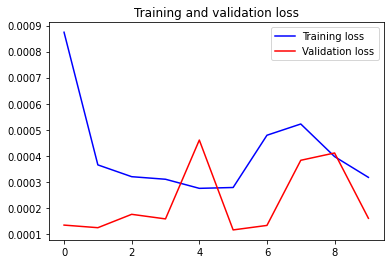

In [94]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss)) 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()



In [95]:
test_data = scaled_data[training_data_len + validation_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len + validation_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse



1.1725204230381578

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



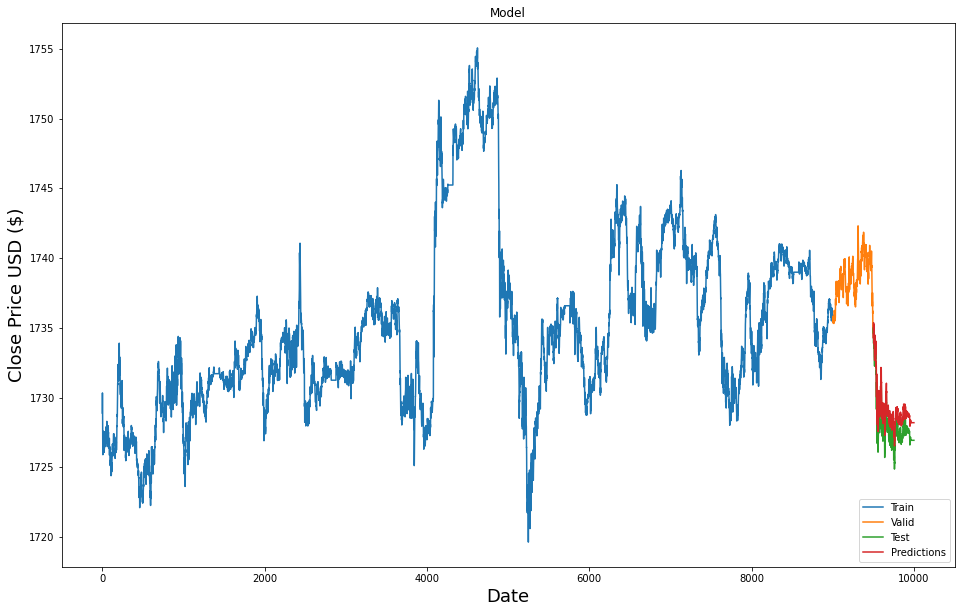

In [103]:
train = data[:training_data_len]
valid = data[training_data_len : training_data_len + validation_data_len]
test = data[training_data_len + validation_data_len:]
test['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,10))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close']])
plt.plot(test[['Close','Predictions' ]])
plt.legend(['Train', 'Valid',  'Test', 'Predictions'], loc='lower right')
plt.show()



# New Section